
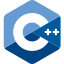
<br>

<div style="text-align:center; font-size:200%;">
 <b>GoF: Singleton Pattern</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 16 GoF Singleton Pattern.ipynb -->
<!-- slides/module_450_design_patterns/topic_250_singleton.cpp -->


## Designproblem: Eine Instanz des Spiels

- Das Spiel benötigt mehrere Ressourcen die von verschiedenen
  Subsystemen aus ansprechbar sein sollen
  - System-Ressourcen (Bildschirm/Renderer)
  - Spielelemente (Figuren, Level)
- Es soll sichergestellt werden, dass jede Resource nur einmal erzeugt
  wird und alle Subsysteme auf die gleiche Resource zugreifen
- Globale Variablen?
- Statische Attribute?
- Flexibler: Eine Klasse, die ihre einzige Instanz selber verwaltet.


### Intention

Stelle sicher, dass eine Klasse nur eine Instanz hat; biete einen globalen
Zugriffspunkt darauf.


### Motivation

Einige Klassen sollten genau eine Instanz haben, z.B. Klassen, die
eindeutigen physischen Ressourcen entsprechen. Diese Instanz sollte
leicht zugänglich sein. Singleton macht die Klasse selbst dafür
verantwortlich, ihre einzige Instanz zu verwalten.


### Anwendbarkeit

Verwende das Singleton-Muster, wenn
- es genau eine Instanz einer Klasse geben muss, und sie von Clients
  von einem bekannten Zugriffspunkt aus zugänglich sein muss
- die einzige Instanz durch Subklassen erweiterbar sein sollte, und
  Clients eine erweiterte Instanz verwenden können sollten, ohne ihren
  Code zu ändern.


### Struktur

<img src="img/pat_singleton_trad.svg"
     style="display:block;margin:auto;width:70%"/>


### Implementierung

Siehe `code/completed/singleton`.

In [ ]:
#include <iostream>

In [ ]:
namespace singleton
{
class SingletonNonThreadSafe
{
private:
    SingletonNonThreadSafe() = default;

    static SingletonNonThreadSafe* instance_;

public:
    static SingletonNonThreadSafe& instance();

    void some_business_logic()
    {
        // ...
    }
};
} // namespace singleton

In [ ]:
namespace singleton
{
SingletonNonThreadSafe* SingletonNonThreadSafe::instance_{};
}

In [ ]:
namespace singleton
{
SingletonNonThreadSafe& SingletonNonThreadSafe::instance()
{
    if (!instance_)
    {
        instance_ = new SingletonNonThreadSafe();
    }
    return *instance_;
}
} // namespace singleton

In [ ]:
template <typename T>
void check_singleton(const T& s1, const T& s2)
{
    if (&s1 == &s2)
    {
        std::cout << "Singleton works, both variables contain the same instance."
                  << std::endl;
    }
    else
    {
        std::cout << "Singleton failed, variables contain different instances."
                  << std::endl;
    }
}

In [ ]:
using namespace singleton;

In [ ]:
SingletonNonThreadSafe& s1{SingletonNonThreadSafe::instance()};
SingletonNonThreadSafe& s2{SingletonNonThreadSafe::instance()};

In [ ]:
check_singleton(s1, s2);

In [ ]:
#include <mutex>

In [ ]:
namespace singleton
{
class SingletonWithMutex
{
private:
    SingletonWithMutex() {}

    static SingletonWithMutex* instance_;
    static std::mutex mutex_; // <----

public:
    static SingletonWithMutex& instance();

    void some_business_logic()
    {
        // ...
    }
};
} // namespace singleton

In [ ]:
namespace singleton
{
SingletonWithMutex* SingletonWithMutex::instance_{};
std::mutex SingletonWithMutex::mutex_{};
} // namespace singleton

In [ ]:
namespace singleton
{
SingletonWithMutex& SingletonWithMutex::instance()
{
    std::lock_guard<std::mutex> lock{SingletonWithMutex::mutex_}; // <----
    if (!instance_)
    {
        instance_ = new SingletonWithMutex();
    }
    return *instance_;
}
} // namespace singleton

In [ ]:
SingletonWithMutex& s3{SingletonWithMutex::instance()};
SingletonWithMutex& s4{SingletonWithMutex::instance()};

In [ ]:
check_singleton(s3, s4);


```cpp
#include <mutex>
#include <thread>
```


```cpp
class SingletonWithCallOnce
{
private:
    SingletonWithCallOnce() {}
    static SingletonWithCallOnce* instance_;
    static std::once_flag flag_; // <----

public:
    static SingletonWithCallOnce& instance();
    void some_business_logic() { /* ... */ }
};
```


```cpp
SingletonWithCallOnce* SingletonWithCallOnce::instance_{};
std::once_flag SingletonWithCallOnce::flag_{};
```


```cpp
SingletonWithCallOnce& SingletonWithCallOnce::instance()
{
    std::call_once(flag_, []() {
        instance_ = new SingletonWithCallOnce();
    });
    return *instance_;
}
```


```cpp
SingletonWithCallOnce& s5{SingletonWithCallOnce::instance()};
SingletonWithCallOnce& s6{SingletonWithCallOnce::instance()};
```


```cpp
check_singleton(s5, s6);
```


### Struktur (Meyers Singleton)

<img src="img/pat_singleton.svg"
     style="display:block;margin:auto;width:70%"/>

In [ ]:
class Singleton
{
private:
    Singleton() {}
    // Delete copy and move operations...

public:
    static Singleton& instance()
    {
        static Singleton instance_{};
        return instance_;
    }

    void some_business_logic()
    {
        // ...
    }
};

In [ ]:
Singleton& s7{Singleton::instance()};
Singleton& s8{Singleton::instance()};

In [ ]:
check_singleton(s7, s8);


### Konsequenzen

Das *Singleton* hat mehrere Vorteile:

- Kontrollierter Zugriff auf die einzige Instanz.
- Geringere Anzahl von globalen Namen.
- Ermöglicht die Verfeinerung von Operationen und Repräsentation.
- Ermöglicht eine variable Anzahl von Instanzen.
- Flexibler als Klassenoperationen.


### Anwendungsbeispiele

- Java: `java.lang.Runtime` oder `org.eclipse.core.runtime.Plugin`.
- Viele C++-Anwendungen implementieren ihre eigenen Singleton-Klassen für
  verschiedene Zwecke.


### Beispiel

<img src="img/pat_game_engine.svg"
     style="display:block;margin:auto;width:70%"/>

In [ ]:
#include <cstdint>
#include <iostream>
#include <memory>
#include <random>

In [ ]:
class GraphicsDevice
{
public:
    GraphicsDevice() { std::cout << "GraphicsDevice created" << std::endl; }
    ~GraphicsDevice() { std::cout << "GraphicsDevice destroyed" << std::endl; }
};

In [ ]:
class GameEngine
{
private:
    uint32_t audio_device_handle;
    bool level_loaded;
    bool characters_loaded;

    GameEngine();
    GameEngine(const GameEngine&) = delete;
    GameEngine& operator=(const GameEngine&) = delete;

public:
    static GameEngine& instance()
    {
        static GameEngine instance{};
        return instance;
    }

    uint32_t get_audio_device_handle() const { return audio_device_handle; }
    void load_level();
    void load_characters();
    void run();
};

In [ ]:
uint32_t current_audio_device_handle{0};

In [ ]:
GameEngine::GameEngine()
    : audio_device_handle(++current_audio_device_handle),
      level_loaded(false),
      characters_loaded(false)
{}

In [ ]:
void GameEngine::load_level()
{
    std::cout << "Loading level..." << std::endl;
    level_loaded = true;
}

In [ ]:
void GameEngine::load_characters()
{
    std::cout << "Loading characters..." << std::endl;
    characters_loaded = true;
}

In [ ]:
void GameEngine::run()
{
    if (!level_loaded)
    {
        std::cerr << "Level not loaded\n";
        return;
    }
    if (!characters_loaded)
    {
        std::cerr << "Characters not loaded\n";
        return;
    }
    std::cout << "Running the game engine\n";
    // Reset variables for the next run
    level_loaded = characters_loaded = false;
}

In [ ]:
void set_up_level()
{
    GameEngine& engine{GameEngine::instance()};
    engine.load_level();
    std::cout << "Setting up the game level\n";
}

In [ ]:
void set_up_characters()
{
    GameEngine& engine{GameEngine::instance()};
    engine.load_characters();
    std::cout << "Setting up the game characters\n";
}


Aufrufreihenfolge von `set_up_level()` und `set_up_characters()` ist
zufällig.

In [ ]:
set_up_level();
set_up_characters();
GameEngine::instance().run();

In [ ]:
GameEngine::instance().run();

In [ ]:
set_up_characters();
set_up_level();
GameEngine::instance().run();